# Анализ результатов А/В теста.

**Цель проекта:** Приоритизировать гипотезы для увеличения выручки в интернет-магазине и сделать выводы по A/B-тесту.

**Задачи проекта:**
- Загрузить данные, изучить, исправить ошибки
- Приоритизировать гипотезы для увеличения выручки
- Проанализировать A/B-тест
- Изучить кумулятивную выручку по группам и  кумулятивный средний чек по группам
- Проанализировать изменения кумулятивного среднего количества заказов группы B к группе A
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
- Сделать выводы, дать рекомендации

**Описание проекта.**

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки в интернет-магазине. Проведён A/B-тест, проанализированы и зафиксированы результаты.

**Описание данных**

Данные первого файла
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале;

Данные второго файла
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ;

Данные третьего файла
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста;

## Приоритизация гипотез.

### Загружаем данные и изучаем их.

In [1]:
#импортируем нужные нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#открываем и смотрим файл
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#приводим названия столбцов к нижниму регистру
hypothesis.columns = hypothesis.columns.str.lower()
pd.options.display.max_colwidth = 100

#проверяем
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применяем фреймворки ICE и RICE для приоритизации гипотез.

In [4]:
#применяем фреймворк ICE для приоритизации гипотез, сортируем по убыванию приоритета, округляем
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display((hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)).round(2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**
- По таблице мы видим, что приоритетными для нас будут гипотезы 8, 0, и 7.

In [5]:
#применяем фреймворк RICE для приоритизации гипотез, сортируем по убыванию приоритета, округляем
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
- Мы видим, что при учёте охвата приоритетность меняется. Теперь приоритетными стали гипотезы 7, 2, 0 и 6, т.к. они затрагивают большее количество пользователей.

In [6]:
#выводим 2 метрики в одной таблице
hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(['ICE', 'RICE'], ascending=False).style.background_gradient(cmap='pink', axis=None, low=0.3, high=1)

,hypothesis,RICE,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


**Вывод:**

- На первом месте по приоритетности гипотеза "7" - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, т.к. она имеет самый большой охват пользователей.
- На втором месте по приоритетности будет гипотиза "2" - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, у этой гипотезы охват в два раза ниже чем у "7", но значительно выше чем у других гипотез.
- Третье место по приоритетности разделяют гипотезы "0" и "6", по охвату они уступают вышеперечисленным гипотезам, но значительно превосходят по охвату оставшиеся гипотезы.
- Если в ICE приоритетными были гипотезы "8", "0", "7", то в RICE - "7"(она была на 3 мете), "2"(она была на 5 месте), "0"(она была на 2 месте). Также мы видим, что гипотеза "8", которая была на первом месте в таблице ICE сместилась на 5 место. Такое отличие продиктовано, тем что в фреймворке RICE мы учитываем важный параметр - Reach (охват пользователей,которых затронет изменение). Так как цифры пользователей, которых затронет изменение, у гипотизы "7" и "2" самые высокие, то данные гипотезы стоит рассмотреть для тестирования.

## Анализ A/B-теста.

### Предобработка данных.

In [7]:
#просматриваем результаты A/B-теста, который мы провели
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head(5))

visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#смотрим типы данных
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


**Вывод:**
- В столбцах "date" необходимо будет изменить тип данных на datetime.

In [9]:
#меняем тип данных
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

#проверяем
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


**Вывод:**
- Все изменено успешно.

In [10]:
#ищем пропуски в данных
print(orders.isna().sum())

print(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


**Вывод:**
- Пропусков нет.

In [11]:
#ищем дубликаты в данных
print(orders.duplicated().sum())

print(visitors.duplicated().sum())

0
0


**Вывод:**
- Дубликатов нет.

In [12]:
#посмотрим число покупателей по группам
print(orders.groupby('group').agg({'visitorId': 'nunique'}).sum()[0])

#посмотрим сколько уникальных покупателей
print(orders['visitorId'].nunique())

#проверяем есть ли пользователи, участвующие сразу в двух группах теста
group_a  = orders.loc[orders['group']=='A', 'visitorId']
group_b = orders.loc[orders['group']=='B', 'visitorId']

list(set(group_a).intersection(set(group_b)))

1089
1031


[3957174400,
 3984495233,
 2780786433,
 1294878855,
 1648269707,
 1614305549,
 4120364173,
 232979603,
 199603092,
 4266935830,
 2712142231,
 2587333274,
 2716752286,
 3891541246,
 1668030113,
 2654030115,
 3234906277,
 1230306981,
 1404934699,
 3803269165,
 2949041841,
 237748145,
 457167155,
 2927087541,
 1738359350,
 3062433592,
 3656415546,
 818047933,
 393266494,
 963407295,
 471551937,
 2579882178,
 3202540741,
 2686716486,
 1333886533,
 2044997962,
 3941795274,
 1801183820,
 2378935119,
 4256040402,
 4069496402,
 3766097110,
 8300375,
 351125977,
 1602967004,
 276558944,
 2038680547,
 3951559397,
 3963646447,
 4186807279,
 3717692402,
 1959144690,
 2458001652,
 2600415354,
 2954449915,
 1316129916,
 477780734,
 3972127743]

**Вывод:**
- Пользователи, участвующие сразу в двух группах теста есть, но их количество незначительно. Возможно, это просто пользователи, которые сделали большое количество заказов. Тест продолжаем, т.к. это не повлияет на результаты. 

### Строим график кумулятивной выручки по группам.

In [13]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


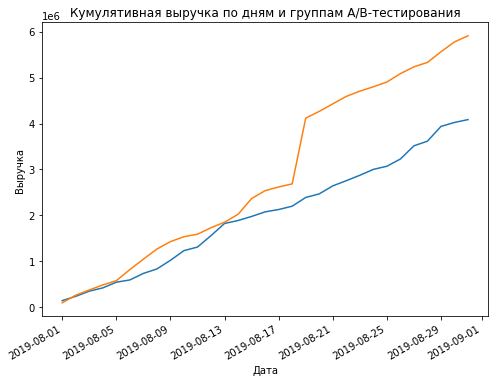

In [14]:
#создаём датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#создаём датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#приводим столбец 'date' к нужному формату
cumulativeRevenueA['date'] = pd.to_datetime(cumulativeRevenueA['date'], format='%Y-%m-%d')
cumulativeRevenueB['date'] = pd.to_datetime(cumulativeRevenueB['date'], format='%Y-%m-%d')

#строим график выручки групп А и B
fig = plt.figure(figsize=[8,6])

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
fig.autofmt_xdate()

plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.show()

**Вывод:**
- Выручка группы А почти равномерно увеличивается в течение всего теста. Выручка группы В в нескольких точках резко растёт, особенно выделяется на графике резкий рост 2019-08-18. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Строим график кумулятивного среднего чека по группам.

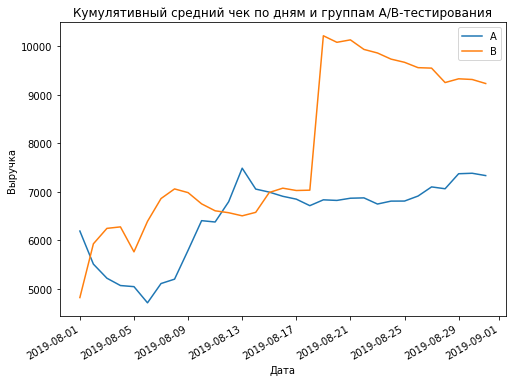

In [15]:
#строим график
fig = plt.figure(figsize=[8,6])

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

fig.autofmt_xdate()
plt.legend()

plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.show()

**Вывод:**
- Средний чек становится равномерным ближе к концу теста, до этого на графике мы видим всплески в группах А и В. Возможно, в группу B 2019-08-18 попал очень крупный заказ (резкий всплеск на графике). 

### Строим график относительного изменения кумулятивного среднего чека группы B к группе A.

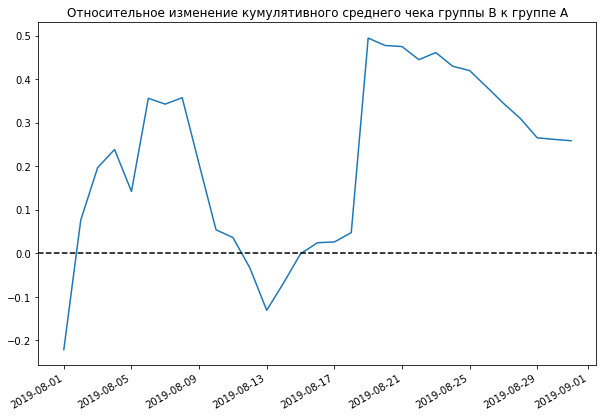

In [16]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#cтроим график
fig = plt.figure(figsize=[10,7])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
fig.autofmt_xdate()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')


plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод:**
- В нескольких точках график различия между сегментами резко «скачет». Сначала средний чек группы B прогрессивно растет, затем резко падает, потом снова резко взлетает. Вероятно, имеются крупные заказы и выбросы.

### Строим график кумулятивной конверсии по группам.

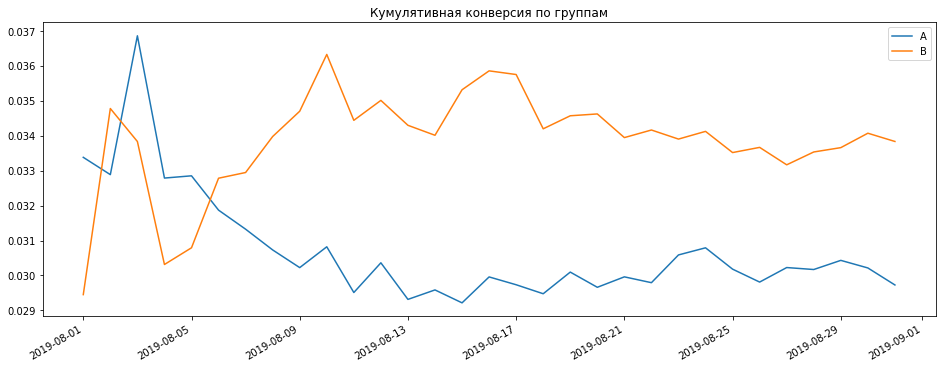

In [17]:
#считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим графики
fig = plt.figure(figsize=[16,6])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()

plt.title('Кумулятивная конверсия по группам')
plt.show()

**Вывод:**
- Видно, что график получился несимметричный. Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд, а конверсия группы A просела, после чего обе группы зафиксировались.

### Строим график относительного изменения кумулятивной конверсии группы B к группе A.

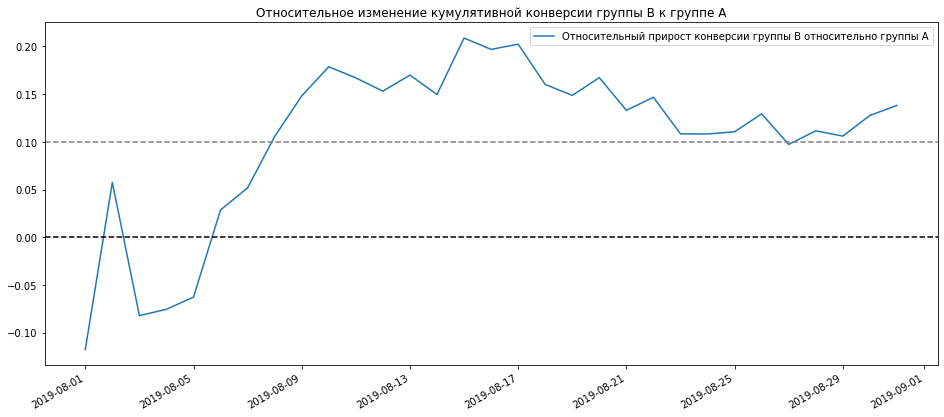

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[16,7])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

fig.autofmt_xdate()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.show()

**Вывод:**
- В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия зафиксировалась стабильно выше группы А. Стоит проанализировать аномалии, возможно, они изменят картину.

### Строим точечный график количества заказов по пользователям.

In [19]:
#считаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

#переименовываем столбцы
ordersByUsers.columns = ['visitors','orders']

display(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

,visitors,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


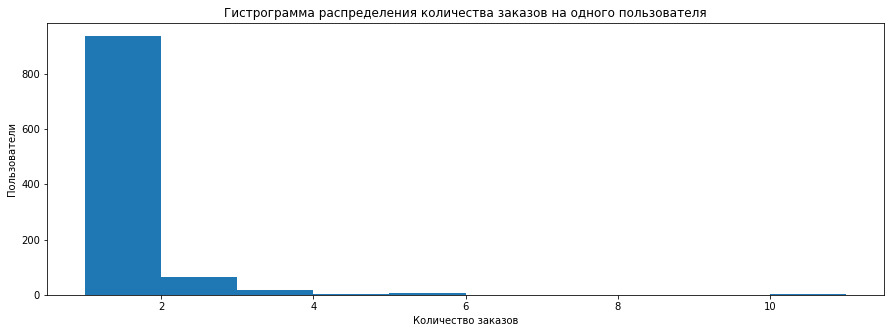

In [20]:
#строим гистрограмму распределения количества заказов на одного пользователя
plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Пользователи')

plt.show()

**Вывод:**
- Большая часть покупателей делали один заказ. Также на графике видно, что имеется значительное количество пользователей сделавших от 2х до 4х заказов.

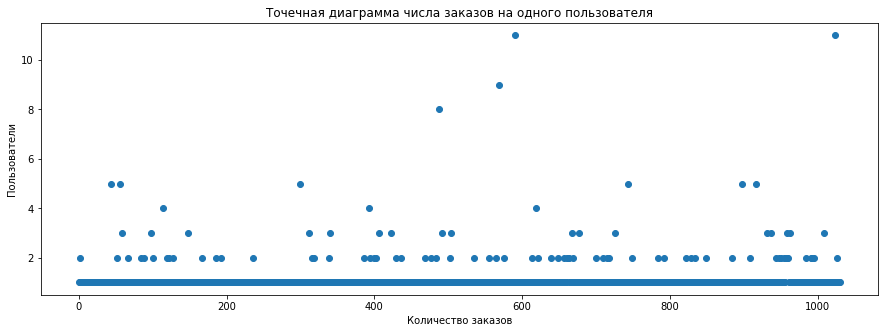

In [21]:
#строим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Пользователи')
plt.xlabel('Количество заказов')

plt.show()

**Вывод:**
- На графике можно отметить значительное количество пользователей с 2-4 заказами. Преобладающее большенство пользователей делали один заказ.

### Считаем 95-й и 99-й перцентили количества заказов на пользователя.

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод:**
- Не более 5% пользователей сделали более двух заказов. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов.

### Строим точечный график стоимостей заказов.

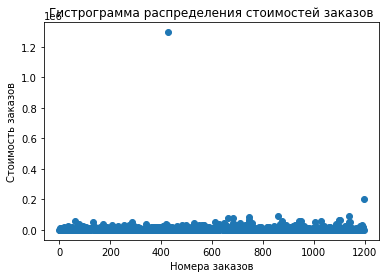

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Гистрограмма распределения стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Номера заказов')
plt.show()

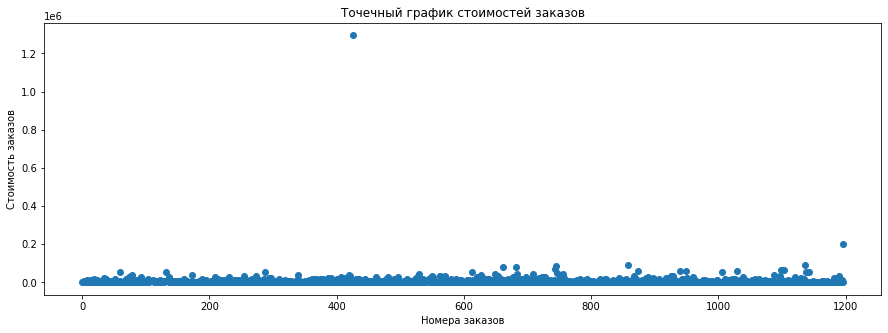

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Номера заказов')
plt.show()

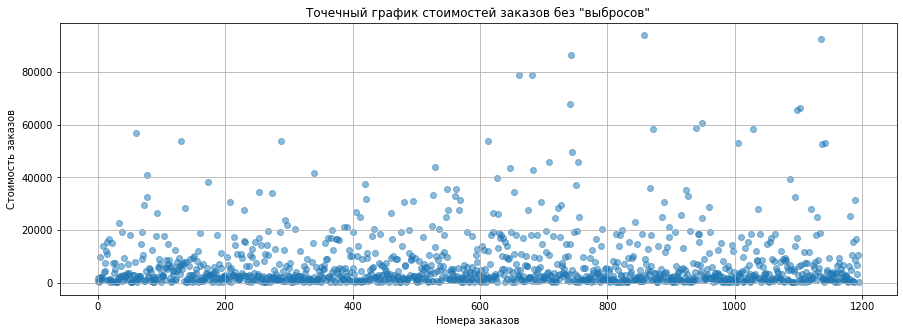

In [25]:
#строим более наглядный график, для это уберем явные выбросы
norm_orders = orders[orders['revenue']<=150000]['revenue']

xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.scatter(xn_values, norm_orders, alpha=0.5)
plt.grid()

plt.title('Точечный график стоимостей заказов без "выбросов"')
plt.ylabel('Стоимость заказов')
plt.xlabel('Номера заказов')
plt.show()

**Вывод:**
- Бльшая часть заказов находится в пределах 100тыс, но есть выбросы. На графике видно заказ, стоимостью более 1млн., скорее всего этот заказ отразился на всех графиках.

### Считаем 95-й и 99-й перцентили стоимости заказов.

In [26]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**
- Менее 5% заказов стоят дороже 28000. Возьмём 28000 за границу для определения аномальных заказов.

### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [27]:
#считаем количество пользователей до выбранной даты включительно в группах A и B

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#считаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


# Получаем таблицу с количеством заказов, выручкой в день, количество заказов и выручка до выбранной даты(включительно)
# Количество пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [28]:
#создаём переменные ordersByUsersA и ordersByUsersB со столбцами 'userId' и 'orders'
#в столбцах для пользователей, которые заказывали хотя бы 1 раз, указываем число совершённых заказов

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

**Подготавливаем выборки к проверке критерием Манна-Уитни.** Так как у нас в данных есть большие (по сравнению с нормальным распределением) выбросы, сильно сдвигающие параметрические результаты.

In [29]:
#объявляем переменные,где пользователям из разных групп будет соответствовать количество заказов 
#тем, кто ничего не заказал присваиваем нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
#выводим относительный прирост среднего числа заказов группы B
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**Формулируем гипотезы.** 

- Нулевая гипотеза: В конверсии по «сырым» данным между группами различий нет. 
- Альтернативная гипотеза: Имеются статистически значимые различия в конверсии по «сырым» данным между группами.

In [31]:
print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница в сравниваемых величинах:", "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.017
Относительная разница в сравниваемых величинах: 0.138


**Вывод:**
- P-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.
- По «сырым» данным мы видим различия в конверсии групп A и B. Относительная разница в конверсиях примерно 14%, благодаря приросту в группе В.


### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Формулируем гипотезы.** 
- Нулевая гипотеза: В среднем чеке заказа по «сырым» данным между группами различий нет. 
- Альтернативная гипотеза: Имеются статистически значимые различия в среднем чеке заказа по «сырым» данным между группами.

In [32]:
#передаём критерию mannwhitneyu() данные о выручке с заказов
#находим относительные различия в среднем чеке между группами
print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная разница в сравниваемых величинах:", "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительная разница в сравниваемых величинах: 0.259


**Вывод:**
- P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке заказа между группами различий нет, нет. Впрочем, средний чек группы B почти на 26% выше среднего чека группы A.

### Считаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

- Следует отметить, что 95-й перцентиль стоимости заказов равен 28000. Возьмёи его за границу для определения аномальных заказов. Также, не более 5% пользователей сделали более двух заказов. Выбраем 2 заказа на одного пользователя за верхнюю границу числа заказов.
- Принимаем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28000. Так мы убираем 5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами. Делаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединяем их в таблице abnormalUsers.

In [33]:
#делаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders
#и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders 
#объединяем их в таблице abnormalUsers 
#узнаем, сколько всего аномальных пользователей методом shape()

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 95)]['userId'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'], 95)]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей:", abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных пользователей: 74


In [34]:
#оцениваем относительные потери пользователей
print("Относительные потери пользователей составили:", "{0:.3f}".format(74/orders['visitorId'].nunique()))

Относительные потери пользователей составили: 0.072


**Вывод:**
- Относительные потери пользователей составили примерно 7%.

**Формулируем гипотезы.** 

- Нулевая гипотеза: В конверсии по «очищенных» данным между группами различий нет. 
- Альтернативная гипотеза: Имеются статистически значимые различия в конверсии по «очищенных» данным между группами.

In [35]:
#смотрим как действия аномальных пользователей повлияли на результаты теста,
#считаем статистическую значимость различий в конверсии 
#между группами теста по очищенным данным,
#подготавливаем выборку количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительная разница в сравниваемых величинах:", "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Относительная разница в сравниваемых величинах: 0.173


**Вывод:**
- Результаты практически не изменились. p-value остался значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем.
- По очищенным данным есть статистически значимые различия в конверсии групп A и B. Относительный прирост конверсии группы B приблизительно равен 17%.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Формулируем гипотезы.** Нулевая гипотеза: В "очищенных" данных статистически значимых различий в среднем чеке между группами нет. Альтернативная гипотеза: Имеются статистически значимые различия в среднем чеке между группами в "очищенных" данных.

In [36]:
print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительная разница в сравниваемых величинах:", "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.738
Относительная разница в сравниваемых величинах: -0.020


**Вывод:**
- По очищенным данным статистически значимых различий среднего чека между группами нет. P-value практически не изменился.
- Появилась обратная разница между группами. Очищенные данные показывают, что средний чек группы B меньше, чем в группе A. На сырых данных чек группы B был на 26% больше, поэтому мы можем сделать вывод, что аномалии сильно искажали реальную картину.

## Общий вывод по результатам A/B теста.

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеют тенденцию к росту.
- На графике среднего чека мы наблюдаем колебания, таким образом выводы по данному графику затруднительны.

**На основании проведённых исследований, можно остановить тест и зафиксировать победу группы B. Так как при анализе различий в конверсии между группами по «очищенным» данным было выявлено, что относительный прирост конверсии группы B составляет примерно 17%. При этом статистически значимых различий среднего чека между группами не обнаружено.**

